In [1]:
from pathlib import Path

from math import floor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def fes(tk):
    """Calculate saturated vapor pressure given temperature in Kelvin.
    Args:
        tk (Float_0D): _description_
    Returns:
        Float_0D: _description_
    """
    # tc = tk - 273.15
    # return 613.0 * jnp.exp(17.502 * tc / (240.97 + tc))
    # Use the matlab version here to keep consistent
    return 100.0 * np.exp(54.8781919 - 6790.4985 / tk - 5.02808 * np.log(tk))

%load_ext autoreload
%autoreload 2

In [ ]:
# Data source: https://ameriflux.lbl.gov/sites/siteinfo/US-Bi1
f = "AMF_US-Bi1_FLUXNET_FULLSET_DD_2016-2021_3-5.csv"

# Read data

In [7]:
# Read the dataframe
df = pd.read_csv(f)

In [8]:
df.head()

,TIMESTAMP,TA_F_MDS,TA_F_MDS_QC,TA_F_MDS_NIGHT,TA_F_MDS_NIGHT_SD,TA_F_MDS_NIGHT_QC,TA_F_MDS_DAY,TA_F_MDS_DAY_SD,TA_F_MDS_DAY_QC,TA_ERA,...,GPP_DT_CUT_SE,GPP_DT_CUT_05,GPP_DT_CUT_16,GPP_DT_CUT_25,GPP_DT_CUT_50,GPP_DT_CUT_75,GPP_DT_CUT_84,GPP_DT_CUT_95,RECO_SR,RECO_SR_N
0,20160101,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,2.430,...,0.271922,1.88307,1.98157,2.15617,4.95832,5.76738,6.04558,6.16251,-9999,-9999
1,20160102,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,3.465,...,0.250780,1.80122,1.90050,2.07981,4.62635,5.34610,5.61396,5.73969,-9999,-9999
2,20160103,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,5.179,...,0.217594,1.66946,1.76978,1.95629,4.09791,4.67619,4.92746,5.06687,-9999,-9999
3,20160104,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,6.613,...,0.101798,1.03310,1.12347,1.16564,2.03932,2.21341,2.36504,2.49025,-9999,-9999
4,20160105,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,8.233,...,0.132825,1.24848,1.34490,1.52510,2.63602,2.89617,3.08431,3.22871,-9999,-9999


In [10]:
# Get the time frame
df.index = pd.to_datetime(df["TIMESTAMP"], format="%Y%m%d")

In [11]:
start, end = "2018-07-01", "2020-06-30"

# Extract data of interest

In [45]:
# df[start:end].shape
df_sub = df[start:].copy()

In [46]:
# Variables of interest
varns = [
    "TA_F", "SW_IN_F", "VPD_F_MDS", "WS_F", "CO2_F_MDS", "PA_F",
    "USTAR", "TS_F_MDS_4", "SWC_F_MDS_1", "P_F", "LE_F_MDS",
    "H_F_MDS", "NETRAD", "G_F_MDS", "NEE_VUT_REF",
]
rename = [
    "TA", "SW_IN", "VPD", "WS", "CO2", "PA",
    "USTAR", "TS", "SWC", "P", "LE",
    "H", "NETRAD", "G", "NEE",
]
df_sub = df_sub[varns]

df_sub.rename(columns=dict(zip(varns, rename)), inplace=True)

<Axes: xlabel='TIMESTAMP'>

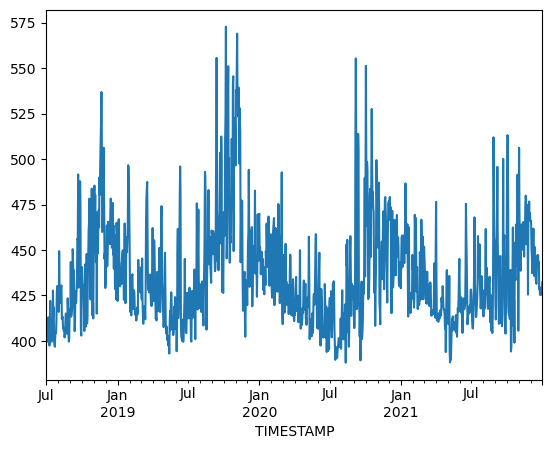

In [48]:
# Clean up the negative CO2 ppm
df_sub.loc[df_sub["CO2"] <= 100, "CO2"] = np.nan
df_sub["CO2"].plot()

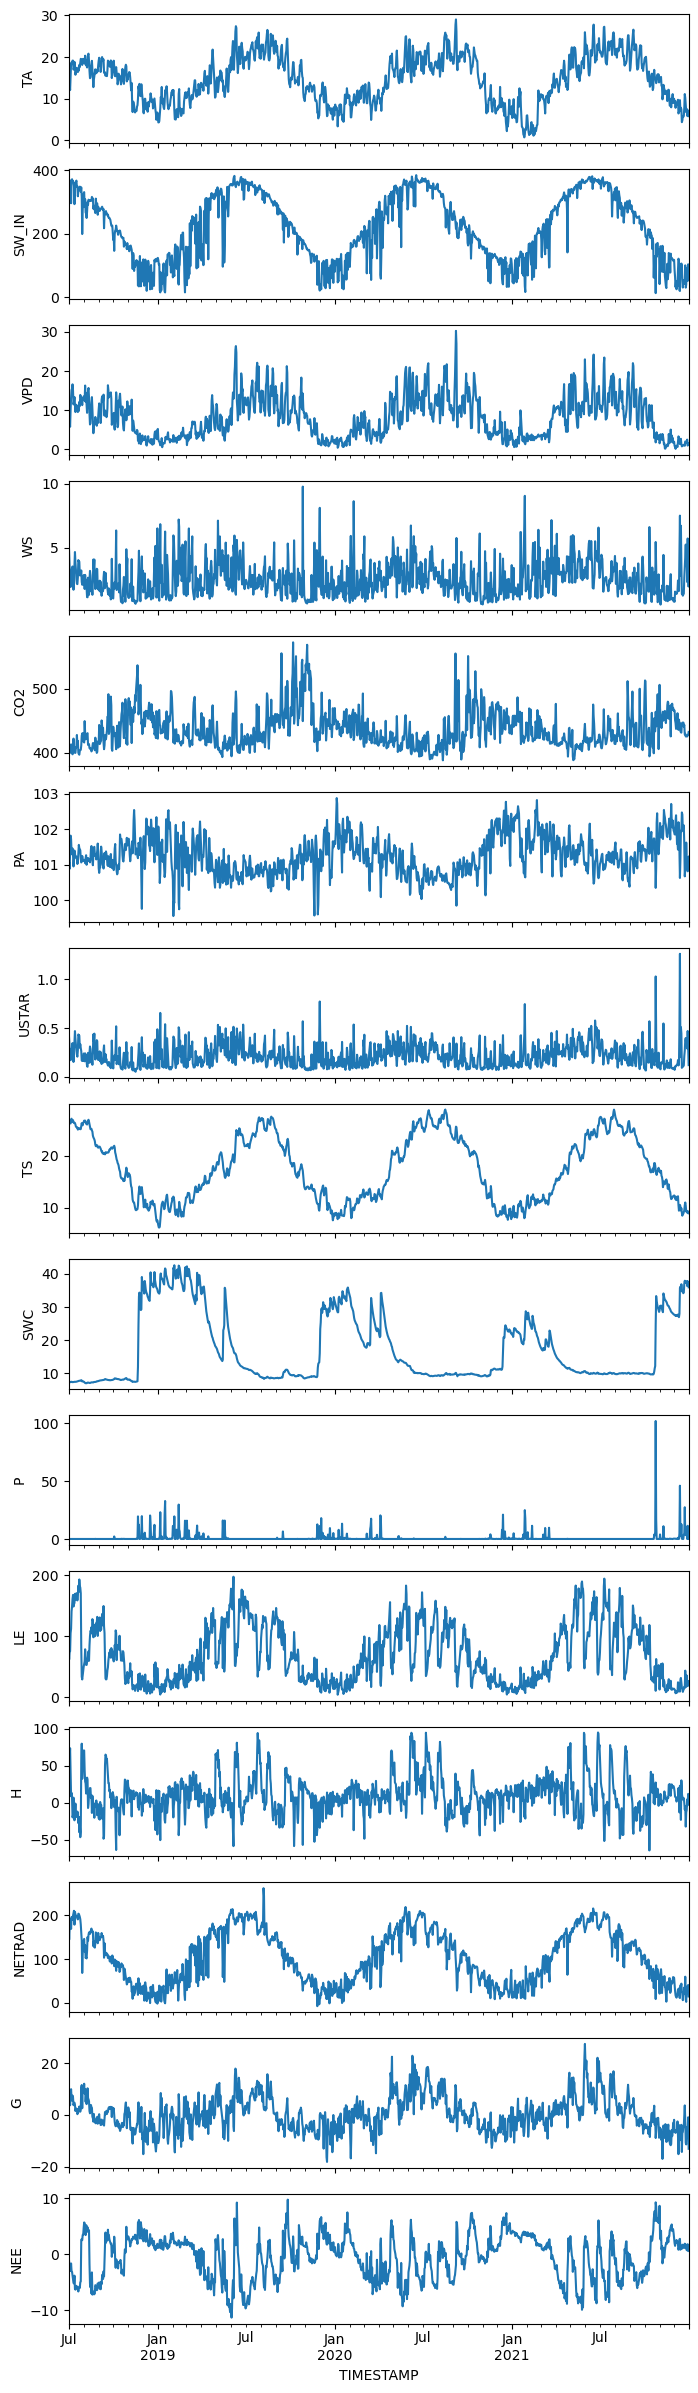

In [50]:
fig, axes = plt.subplots(len(varns), 1, figsize=(8, 2*len(varns)), sharex=True)
for i, varn in enumerate(rename):
    ax = axes[i]
    df_sub[varn].plot(ax=ax)
    ax.set(ylabel=varn)

# Save the data

In [51]:
df_sub.to_csv("US-Bi1-sub.csv", sep=",")